# Импорт библиотек

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/realestatepriceprediction/sample_submission.csv
/kaggle/input/realestatepriceprediction/test.csv
/kaggle/input/realestatepriceprediction/train.csv


# Смотрим на данные

In [2]:
df_train = pd.read_csv('/kaggle/input/realestatepriceprediction/train.csv')
df_test = pd.read_csv('/kaggle/input/realestatepriceprediction/test.csv')
df_submission = pd.read_csv('/kaggle/input/realestatepriceprediction/sample_submission.csv')

- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

## Тренировочный датасет

In [3]:
df_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
print(df_train.info())
print(df_train.shape)
df_train.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [5]:
df_train[df_train['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2113.0,8256.636062,4835.706043,28.000000,3917.000000,8308.000000,12357.000000,16777.000000
DistrictId,2113.0,26.999527,24.928012,0.000000,6.000000,23.000000,33.000000,190.000000
Rooms,2113.0,1.778987,0.764316,0.000000,1.000000,2.000000,2.000000,5.000000
Square,2113.0,60.352646,22.846588,17.414181,43.624731,58.634866,68.843287,604.705972
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,2113.0,1.383814,2.725244,0.000000,1.000000,1.000000,1.000000,62.000000
Floor,2113.0,9.913393,5.563304,1.000000,5.000000,9.000000,14.000000,27.000000
HouseFloor,2113.0,13.248935,8.091366,0.000000,4.000000,17.000000,17.000000,30.000000
HouseYear,2113.0,1981.707525,12.690541,1977.000000,1977.000000,1977.000000,1977.000000,2019.000000
Ecology_1,2113.0,0.105183,0.113981,0.000000,0.007122,0.072158,0.197368,0.437885


In [6]:
df_train['LifeSquare'] = df_train['LifeSquare'].fillna(df_train['LifeSquare'].median())

In [7]:
df_train[df_train['Healthcare_1'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4798.0,8386.307211,4864.658955,2.000000,4144.250000,8420.500000,12589.500000,16797.000000
DistrictId,4798.0,41.983535,37.386871,1.000000,23.000000,27.000000,62.000000,208.000000
Rooms,4798.0,1.855356,0.859970,0.000000,1.000000,2.000000,2.000000,19.000000
Square,4798.0,56.989643,19.691782,1.136859,42.040604,53.492440,66.647835,212.932361
LifeSquare,4798.0,37.732678,108.818303,0.641822,29.098971,32.781260,41.116334,7480.592129
KitchenSquare,4798.0,5.856398,29.563604,0.000000,1.000000,6.000000,9.000000,2014.000000
Floor,4798.0,8.867653,5.358387,1.000000,5.000000,8.000000,12.000000,37.000000
HouseFloor,4798.0,12.830763,6.977174,0.000000,9.000000,14.000000,17.000000,99.000000
HouseYear,4798.0,1987.670488,17.684670,1910.000000,1977.000000,1977.000000,2005.000000,2020.000000
Ecology_1,4798.0,0.090077,0.100627,0.000000,0.011654,0.072158,0.101872,0.521867


df_train['Healthcare_1'] = df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median())

In [8]:
df_train = df_train.drop(['Healthcare_1'], axis=1)
df_test = df_test.drop(['Healthcare_1'], axis=1)

In [9]:
print(df_test.info())
print(df_test.shape)
df_test.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: float

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


## Тестовый датасет 

In [10]:
df_test[df_test['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1041.0,8679.432277,4749.849878,30.000000,4780.000000,8744.000000,12713.000000,16786.000000
DistrictId,1041.0,27.707973,26.446994,1.000000,6.000000,23.000000,33.000000,169.000000
Rooms,1041.0,1.801153,0.753095,1.000000,1.000000,2.000000,2.000000,6.000000
Square,1041.0,60.448508,19.006856,26.719723,44.431455,60.072328,69.877653,163.325901
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,1041.0,1.480307,3.107350,0.000000,1.000000,1.000000,1.000000,61.000000
Floor,1041.0,10.319885,6.014444,1.000000,5.000000,9.000000,15.000000,28.000000
HouseFloor,1041.0,13.254563,8.308102,0.000000,3.000000,17.000000,17.000000,31.000000
HouseYear,1041.0,1982.261287,13.310238,1977.000000,1977.000000,1977.000000,1977.000000,2020.000000
Ecology_1,1041.0,0.101632,0.111492,0.000000,0.007122,0.072158,0.195781,0.437885


In [11]:
df_test['LifeSquare'] = df_test['LifeSquare'].fillna(df_test['LifeSquare'].median())

df_test[df_test['Healthcare_1'].isnull()].describe().T

df_test['Healthcare_1'] = df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median())

# Разделим признаки на числовые и текстовые

In [12]:
feat_numeric = list(df_train.select_dtypes(exclude='object').columns)
feat_object = list(df_train.select_dtypes(include='object').columns)
target = 'Price'

In [13]:
feat_numeric

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Price']

### Удалим идентификатор, т.к. он не характеризует наши данные

In [14]:
feat_numeric.pop(0)

'Id'

### Строим гистограммы, чтобы найти признаки с выбросами

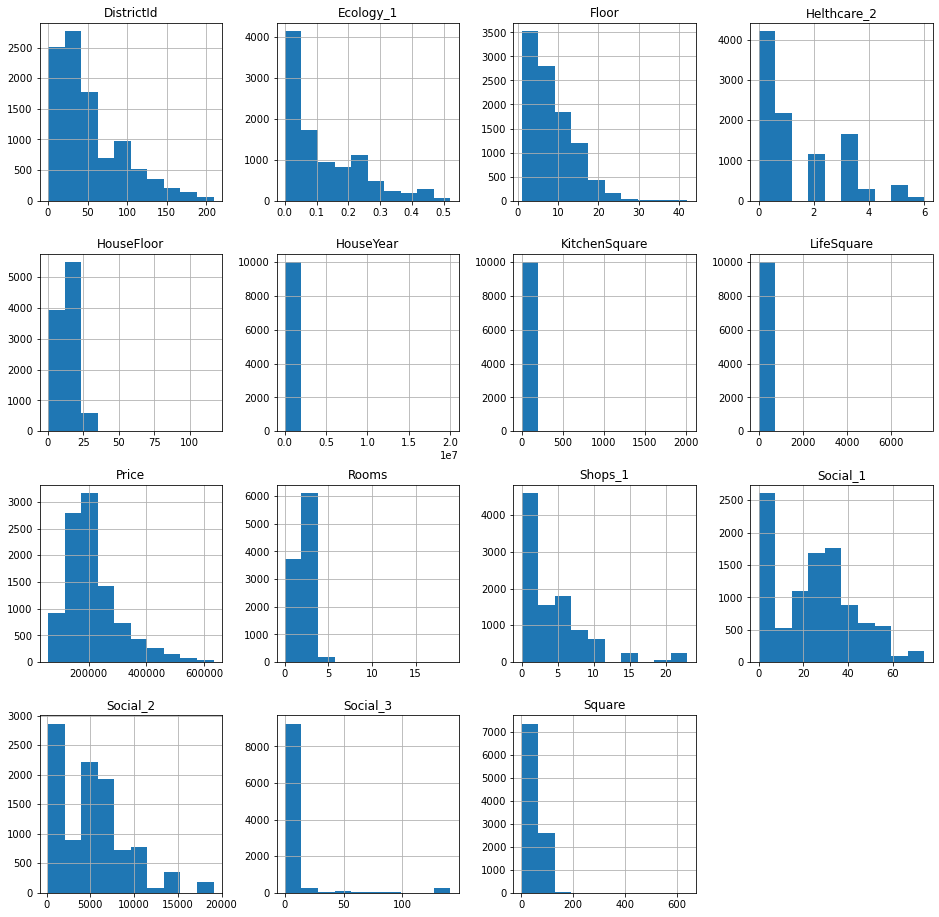

In [15]:
df_train[feat_numeric].hist(
    figsize=(16,16)
)
plt.show()

#### У признака года есть кривые значения - удаляем их и проверяем тестовый датасет на отсутствие этого шума

In [16]:
df_train['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [17]:
df_train[df_train['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [18]:
df_train.drop(
    index=df_train[df_train['HouseYear']>2020].index,
    axis=0,
    inplace=True
)

In [19]:
df_train[df_train['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [20]:
df_test[df_test['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


#### Аналогично проверяем признак жилой площади

In [21]:
df_train[df_train['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366


In [22]:
df_test[df_test['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [23]:
df_train.drop(
    index=df_train[df_train['LifeSquare']>1000].index,
    axis=0,
    inplace=True
)

In [24]:
df_train[df_train['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [25]:
df_train[df_train['KitchenSquare']>df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


#### Площадь кухни не может быть больше площади здания, поэтому заменим выбросы на среднюю часть площади кухни от всего здания

In [26]:
df_train[df_train['KitchenSquare']>df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


In [27]:
df_test[df_test['KitchenSquare']>df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B


In [28]:
_ = df_train[df_train['KitchenSquare']<=df_train['Square']][['Square', 'KitchenSquare']].median()
square, kitchen = _[0], _[1]

In [29]:
kitchen/square

0.11421113500972621

In [30]:
df_train.loc[df_train['KitchenSquare']>df_train['Square'], 'KitchenSquare'] = \
    df_train.loc[df_train['KitchenSquare']>df_train['Square'], 'Square'] * kitchen/square

In [31]:
df_train[df_train['KitchenSquare']>df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [32]:
df_test[df_test['KitchenSquare']>df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B


In [33]:
_ = df_test[df_test['KitchenSquare']<=df_test['Square']][['Square', 'KitchenSquare']].median()
square, kitchen = _[0], _[1]

In [34]:
df_test.loc[df_test['KitchenSquare']>df_test['Square'], 'KitchenSquare'] = \
    df_test.loc[df_test['KitchenSquare']>df_test['Square'], 'Square'] * kitchen/square

In [35]:
df_test[df_test['KitchenSquare']>df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


### Обработаем категориальные фичи с помощью технологии One Hot Encoding

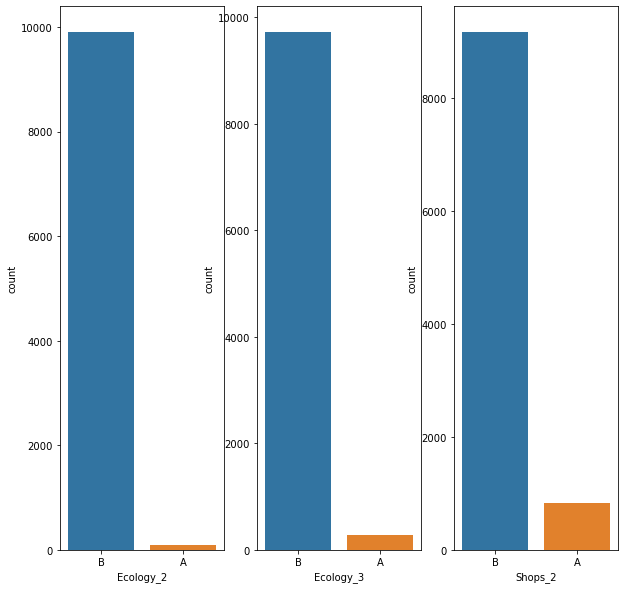

In [36]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 10)
)

for n, f in enumerate(feat_object):
    
    sns.countplot(
        x=f,
        data=df_train,
        ax=ax[n]
    )
    
plt.show()

In [37]:
for col in feat_object:
    
    df_temp = pd.get_dummies(df_train[col])

    df_temp.columns = [col + '_' + c for c in df_temp]
    
    df_train.drop(
        labels=col,
        axis=1,
        inplace=True
    )
    
    df_train = pd.concat(
        objs=(df_train, df_temp),
        axis=1
    )
    
    del df_temp

In [38]:
df_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2,4,150226.531644,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,...,6,3,11,196684.316040,0,1,0,1,0,1
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,0,0,5,189050.289571,0,1,0,1,1,0
9997,5123,27,1.0,47.939008,32.781260,1.0,12,16.0,2015,0.072158,...,1,0,0,159143.805370,0,1,0,1,1,0
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,9,2,5,181595.339808,0,1,1,0,0,1


In [39]:
for col in feat_object:
    
    df_temp = pd.get_dummies(df_test[col])

    df_temp.columns = [col + '_' + c for c in df_temp]
    
    df_test.drop(
        labels=col,
        axis=1,
        inplace=True
    )
    
    df_test = pd.concat(
        objs=(df_test, df_temp),
        axis=1
    )
    
    del df_temp

In [40]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,2748,1,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,...,1437,3,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,629,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,...,5992,0,1,1,0,1,0,1,0,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,...,264,0,0,1,0,1,0,1,0,1
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,...,19083,2,5,15,0,1,0,1,0,1
4998,4780,62,2.0,81.305222,32.925087,0.0,4,0.0,1977,0.072158,...,629,1,0,0,0,1,0,1,1,0


## Проанализируем получившиеся признаки и целевую переменную опять же без идентификатора

In [41]:
feat = list(df_train.columns)
feat.pop(0)

'Id'

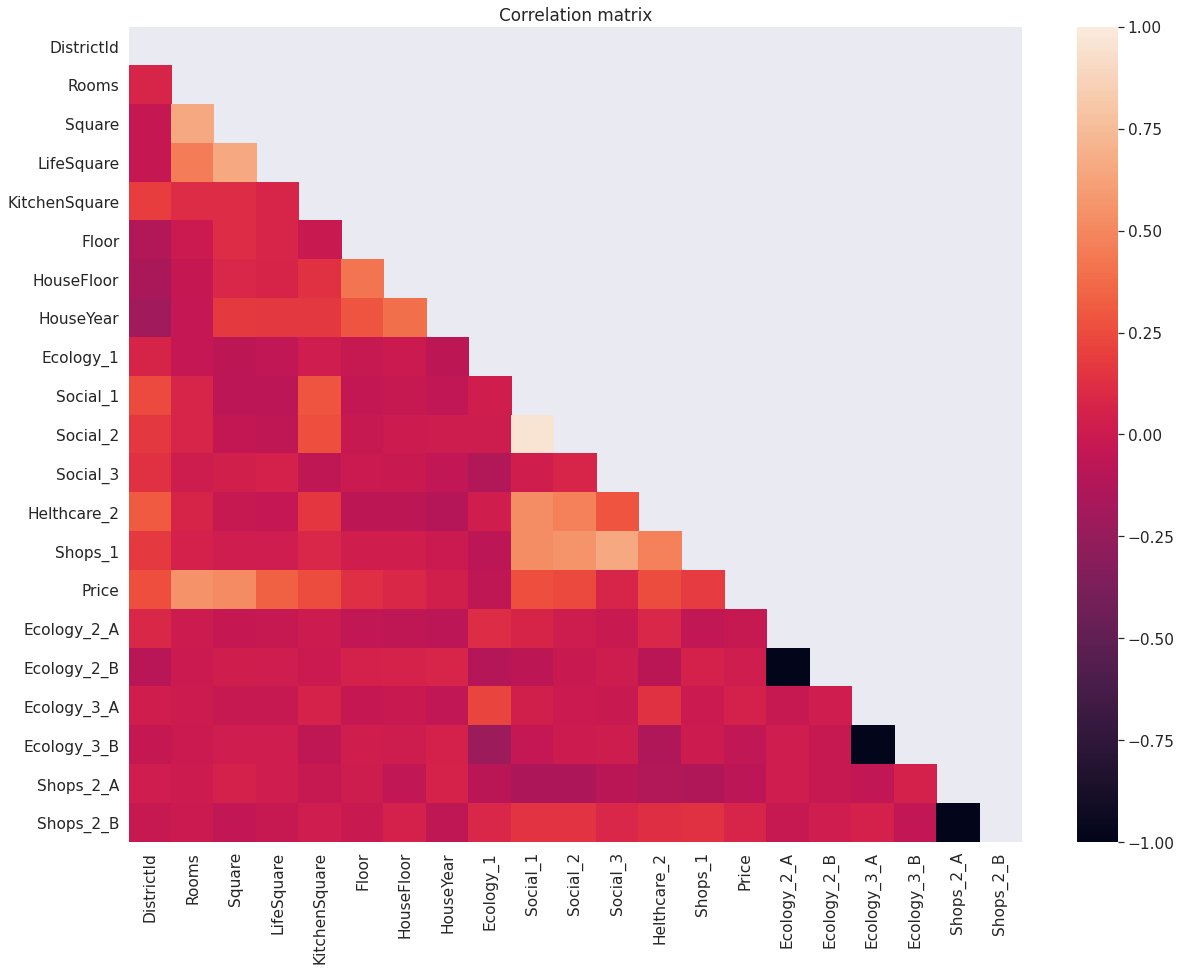

In [42]:
plt.figure(figsize = (20,15))

corr = df_train[feat].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.set(font_scale=1.4)
sns.heatmap(
    data=corr,
    mask=mask,
    annot=False
)

plt.title('Correlation matrix')
plt.show()

In [43]:
df_train = df_train.drop(['Social_2'], axis=1)
df_test = df_test.drop(['Social_2'], axis=1)
feat.pop(feat.index('Social_2'))

'Social_2'

### Значительно коррелирующих признаков на первый взгляд нет. Убираем из признаков целевую переменную.

In [44]:
feat.pop(feat.index('Price'))

'Price'

# Модель

In [45]:
model = sklearn.ensemble.RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=.75,
)

In [46]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    df_train[feat],
    df_train[target]
)

In [47]:
model.fit(
    X=X_train,
    y=y_train
)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.75, max_leaf_nodes=None,
                      max_samples=0.75, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred_train = model.predict(
    X=X_valid
)

sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_pred_train
)

0.7305352359303445

In [49]:
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_train_preds = lr_model.predict(
    X=X_valid
)
sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_train_preds
)

0.5354577255974248

In [51]:
knn_model = sklearn.neighbors.KNeighborsRegressor()
knn_model.fit(
    X=X_train,
    y=y_train
)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [52]:
y_train_preds = knn_model.predict(
    X=X_valid
)
sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_train_preds
)

0.6417602226098388

In [53]:
svr_model = sklearn.svm.SVR(C=1000, epsilon=0.1, gamma=0.1)
svr_model.fit(
    X=X_train,
    y=y_train
)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
y_train_preds = svr_model.predict(
    X=X_valid
)
sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_train_preds
)

-0.05147173163694729

In [55]:
gb_model = sklearn.ensemble.GradientBoostingRegressor(
    random_state=21
)
gb_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
params = {
    'n_estimators': [50, 100, 200, 400], 
    'max_depth': [3, 5, 7, 10]
}

gs = sklearn.model_selection.GridSearchCV(
    gb_model,
    params,
    scoring='r2',
    cv=sklearn.model_selection.KFold(
        n_splits=5,
        random_state=21,
        shuffle=True
    ),
    n_jobs=-1
)
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                             

In [57]:
gs.best_score_

0.7401402916654453

In [58]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [59]:
final_model = sklearn.ensemble.GradientBoostingRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=21
)
final_model.fit(
    X=X_train,
    y=y_train
)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
y_train_preds = final_model.predict(
    X=X_valid
)
sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_train_preds
)

0.7442278776496818

In [61]:
y_pred_test = final_model.predict(
    X=df_test[feat]
)

In [62]:
df_test[target] = y_pred_test

In [63]:
df_test[['Id', 'Price']].to_csv('submission.csv', index=None)

# Точность данной модели R2 = 0.74104